## ENTRENAMIENTO MODELO

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
vino = pd.read_csv('../data/raw/winequality-white.csv', delimiter= ';')
vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
vino_features = vino.drop(columns='quality')
vino_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [14]:
vino_target = vino['quality']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vino_features, vino_target, test_size=0.20, random_state=21)

In [16]:
print((len(X_train), len(y_train)))
print((len(X_test), len(y_test)))

(3918, 3918)
(980, 980)


Teniendo en cuenta que tenemos que predecir el nivel de la calidad del vino, se tratará de un ejercicio de clasificación.

### **1. REGRESIÓN LOGÍSTICA**

In [17]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(solver='liblinear')
logisticRegression.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
logisticRegression.score(X_test, y_test)

0.5306122448979592

No parece que la puntuación sea muy elevada y puede ser que el modelo quede un poco pobre. Vamos a ver si realmente puede predecir la categoría del primer vino del dataset.

In [19]:
logisticRegression.predict_proba(X_test.iloc[:1])

array([[0.00324868, 0.02541074, 0.27743373, 0.50790089, 0.16718931,
        0.01792558, 0.00089108]])

Yendo como van del 3 al 9, se ve claramente que la probabilidad más alta es la de la clase 6. ¿Pero cuál es el resultado más óptimo?

In [20]:
y_test.iloc[:1]

1555    7
Name: quality, dtype: int64

El de la clase 7. Veamos otros modelos.

### **2. ÁRBOL DE DECISIÓN**

In [21]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
decisionTree.score(X_test, y_test)

0.6295918367346939

Esta puntuación parece que ha mejorado algo la anterior.

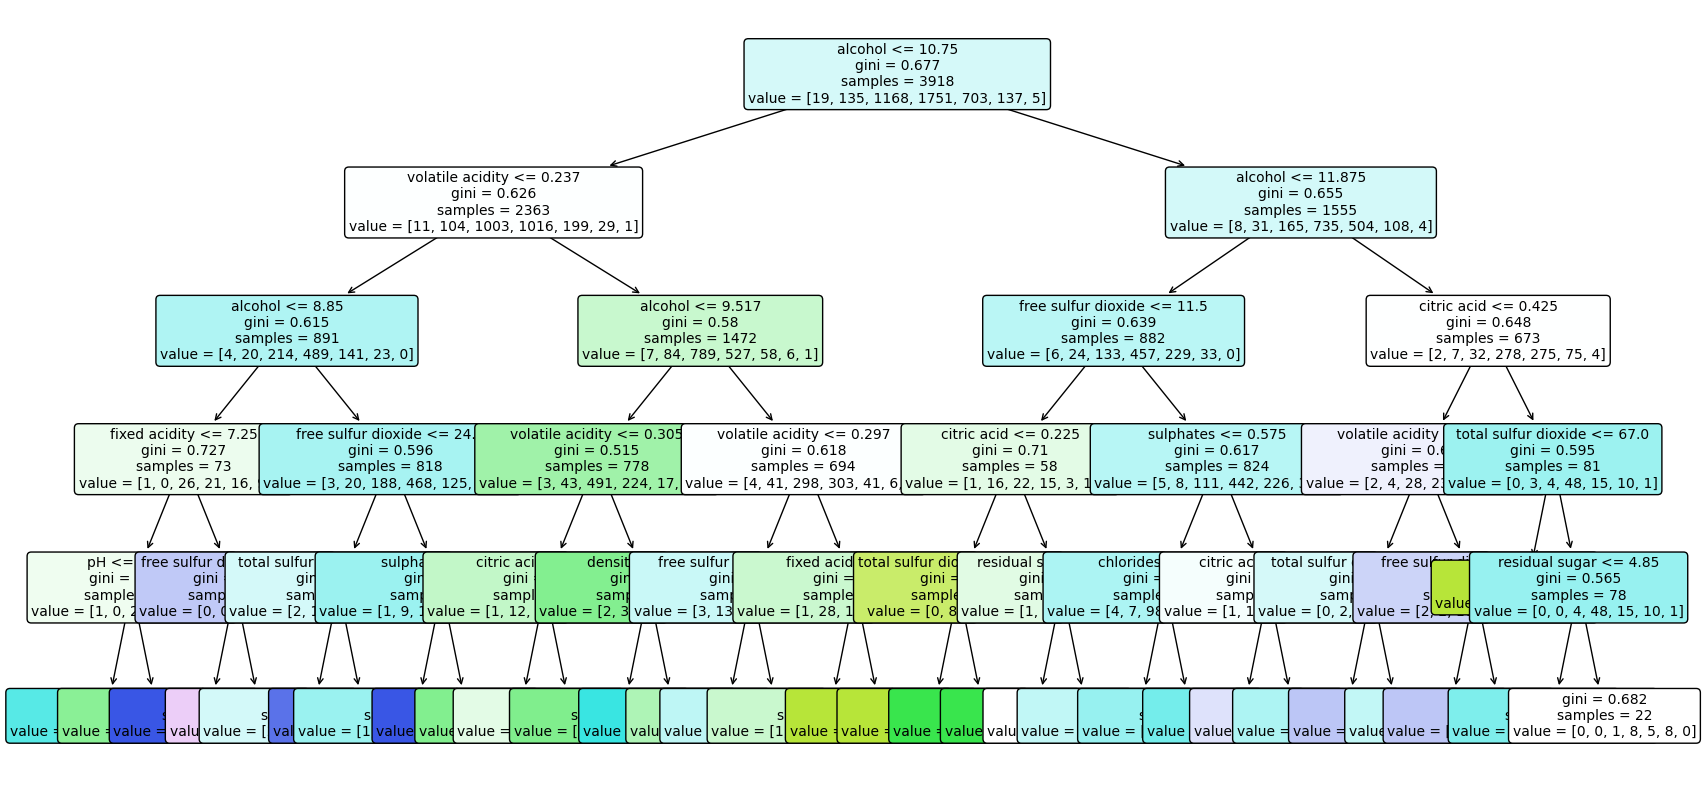

In [35]:
modelo_arbol = tree.DecisionTreeClassifier(max_depth=5)
modelo_arbol.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(modelo_arbol, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()